# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from warnings import filterwarnings
filterwarnings("ignore")

from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

# Load Data

Tidak ada label pada `test.csv` untuk dievaluasi, `test.csv` akan dianggap sebagai data real yang perlu diklasifikasi di akhir, tetapi tidak dapat dievaluasi. `train.csv` akan displit menjadi `train` dan `test` terlebih dulu. `train` akan digunakan untuk pembuatan model dan `test` akan mensimulasikan data real yang dapat dievaluasi.

In [2]:
raw = pd.read_csv('./credit-score-data/train.csv')

data_raw, test = train_test_split(raw, test_size=0.2, random_state=42)
data_raw = data_raw.reset_index(drop=True)
test = test.reset_index(drop=True)
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, test]

- `ID` : Represents a unique identification of an entry
- `Customer_ID` : Represents a unique identification of a person
- `Month` : Represents the month of the year
- `Name` : Represents the name of a person
- `Age` : Represents the age of the person
- `SSN` : Represents the social security number of a person
- `Occupation` : Represents the occupation of the person
- `Annual_Income` : Represents the annual income of the person
- `Monthly_Inhand_Salary` : Represents the monthly base salary of a person
- `Num_Bank_Accounts` : Represents the number of bank accounts a person holds
- `Num_Credit_Card` : Represents the number of other credit cards held by a person
- `Interest_Rate` : Represents the interest rate on credit card
- `Num_of_Loan` : Represents the number of loans taken from the bank
- `Type_of_Loan` : Represents the types of loan taken by a person
- `Delay_from_due_date` : Represents the average number of days delayed from the payment date
- `Num_of_Delayed_Payment` : Represents the average number of payments delayed by a person
- `Changed_Credit_Limit` : Represents the percentage change in credit card limit
- `Num_Credit_Inquiries` : Represents the number of credit card inquiries
- `Credit_Mix` : Represents the classification of the mix of credits
- `Outstanding_Debt` : Represents the remaining debt to be paid (in USD)
- `Credit_Utilization_Ratio` : Represents the utilization ratio of credit card
- `Credit_History_Age` : Represents the age of credit history of the person
- `Payment_of_Min_Amount` : Represents whether only the minimum amount was paid by the person
- `Total_EMI_per_month` : Represents the monthly EMI payments (in USD)
- `Amount_invested_monthly` : Represents the monthly amount invested by the customer (in USD)
- `Payment_Behaviour` : Represents the payment behavior of the customer (in USD)
- `Monthly_Balance` : Represents the monthly balance amount of the customer (in USD)
- `Credit_Score` [**TARGET**] : Represents the bracket of credit score (Poor, Standard, Good)

# Exploratory Data Analysis
**TODO** : Add more eda

In [3]:
print(data_raw.shape)
print(test.shape)

(80000, 28)
(20000, 28)


- 80000 data digunakan untuk `train`
- 20000 data digunakan untuk `test`

In [4]:
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71943 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     68014 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70855 non-null  object 
 14  Delay_

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
65582,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
59615,0x22d6d,CUS_0xb837,April,Caroline Valetkevitcho,22,670-65-6270,Journalist,14070.22,1148.518333,9,...,Bad,2075.81,27.612623,13 Years and 6 Months,Yes,40.165737,132.09018211727295,Low_spent_Small_value_payments,232.59591435953487,Standard
63842,0x7278,CUS_0x83f,July,Fredrikz,34,786-66-2253,Engineer,10333.895,657.157917,3,...,Standard,70.46,35.788181,10 Years and 5 Months,Yes,21.453341,27.375693135514013,Low_spent_Small_value_payments,306.886757995295,Standard
20953,0x2eae,CUS_0x627e,May,Forgioner,30,721-96-8087,Mechanic,72116.25,5886.687500,4,...,Standard,243.75,38.992682,18 Years and 7 Months,No,76.875607,214.74367486637948,High_spent_Medium_value_payments,547.0494678770979,Standard
72805,0x1f49f,CUS_0x9730,June,George Georgiopoulosp,32,637-99-8103,Teacher,55246.77,4390.897500,4,...,Standard,1818.27,34.708745,5 Years and 9 Months,NM,71.205606,89.62237514911597,High_spent_Large_value_payments,518.261768521513,Poor
28907,0x23ef6,CUS_0x949b,May,NaN,35,287-71-5066,Accountant,11958.695,903.557917,3,...,Standard,74.29,31.678316,16 Years and 1 Months,Yes,0.000000,35.98563926245399,Low_spent_Small_value_payments,344.3701524042127,Poor
19081,0x319e,CUS_0x7ce5,January,Singhj,23,#F%$D@*&8,_______,101912.13,8503.677500,5,...,Good,152.6_,29.454223,19 Years and 11 Months,NM,0.000000,295.87664723347774,Low_spent_Medium_value_payments,834.4911027665222,Good
29411,0x21105,CUS_0x65b1,April,Tarab,25,798-29-5581,Musician,20623.16_,1592.596667,6,...,Bad,4973.64,36.789019,12 Years and 8 Months,Yes,108.980663,151.2509422486387,Low_spent_Small_value_payments,189.0280609416265,Standard
37604,0x91a0,CUS_0x29ae,March,Karolina Tagarisb,41,899-22-2246,Mechanic,75723.81,6141.317500,5,...,Good,1198.09,26.070405,33 Years and 1 Months,No,0.000000,448.0357115031228,Low_spent_Medium_value_payments,446.0960384968772,Good
22537,0x3a7c,CUS_0xa79d,March,Lesleyk,45,523-24-1812,Media_Manager,18759.61,1455.300833,8,...,Bad,4983.86,25.261231,0 Years and 9 Months,Yes,87.188140,__10000__,Low_spent_Small_value_payments,283.95646874148827,Poor


Beberapa kolom yang seharusnya numerikal memiliki tipe objek, dapat terjadi karena terdapat beberapa kesalahan input, seperti pada `Annual_Income`: 14516.4_ pada id 0x1e44a.

In [5]:
print("Duplicate Data")
display(data_raw[data_raw.duplicated()])

Duplicate Data


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


Tidak terdapat data duplikat pada `train`

In [6]:
print('Train columns with null values:')
train_null_values = data_raw.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
print(train_null_values)
print("-"*10)

print('Test/Validation columns with null values:')
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
print(test_null_values)
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
Name                        8057
Monthly_Inhand_Salary      11986
Type_of_Loan                9145
Num_of_Delayed_Payment      5602
Num_Credit_Inquiries        1587
Credit_History_Age          7234
Amount_invested_monthly     3585
Monthly_Balance              942
dtype: int64
----------
Test/Validation columns with null values:
Name                       1928
Monthly_Inhand_Salary      3016
Type_of_Loan               2263
Num_of_Delayed_Payment     1400
Num_Credit_Inquiries        378
Credit_History_Age         1796
Amount_invested_monthly     894
Monthly_Balance             258
dtype: int64
----------


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,80000,80000,80000,71943,80000,80000,80000,80000,68014.000000,80000.00000,...,80000,80000,80000.000000,72766,80000,80000.000000,76415,80000,79058,80000
unique,80000,12500,8,10138,1482,12501,16,17842,NaN,NaN,...,4,13006,NaN,404,3,NaN,72849,7,79052,3
top,0x1cebe,CUS_0x4904,May,Stevex,28,#F%$D@*&8,_______,20867.67,NaN,NaN,...,Standard,1360.45,NaN,19 Years and 3 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,10075,39,2280,4464,5679,15,NaN,NaN,...,29198,20,NaN,361,41811,NaN,3422,20313,7,42575
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4203.262484,17.30395,...,NaN,NaN,32.286483,NaN,NaN,1424.354367,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3181.505431,118.18841,...,NaN,NaN,5.114983,NaN,NaN,8384.897755,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.00000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1631.456667,3.00000,...,NaN,NaN,28.053517,NaN,NaN,30.306460,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3106.847500,6.00000,...,NaN,NaN,32.303960,NaN,NaN,69.292156,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5971.218333,7.00000,...,NaN,NaN,36.500044,NaN,NaN,161.747685,NaN,NaN,NaN,NaN


Terdapat missing values pada kolom:
- `Monthly_Inhand_Salary`
- `Type_of_Loan`
- `Name`
- `Credit_History_Age`
- `Num_of_Delayed_Payment`
- `Amount_invested_monthly`
- `Num_Credit_Inquiries`
- `Monthly_Balance`

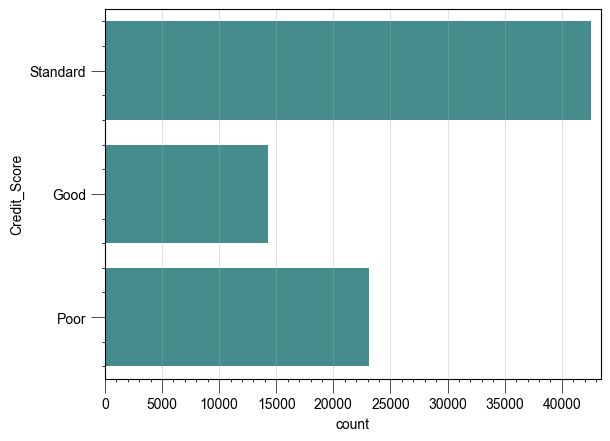

In [7]:
sns.countplot(data_raw['Credit_Score'])
plt.show()

# Preprocessing

In [8]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      71943 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     68014 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70855 non-null  object 
 14  Delay_

## Numerical Columns

In [9]:
nums = ['Age',
        'Annual_Income',
        'Monthly_Inhand_Salary',
        'Num_Bank_Accounts',
        'Num_Credit_Card',
        'Interest_Rate',
        'Num_of_Loan',
        'Delay_from_due_date',
        'Num_of_Delayed_Payment',
        'Changed_Credit_Limit',
        'Num_Credit_Inquiries',
        'Outstanding_Debt',
        'Credit_Utilization_Ratio',
        'Credit_History_Age',
        'Total_EMI_per_month',
        'Amount_invested_monthly',
        'Monthly_Balance',
]
data_raw[nums].describe(include='all')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,80000,80000,68014.000000,80000.00000,80000.000000,80000.000000,80000,80000.000000,74398,80000,78413.000000,80000,80000.000000,72766,80000.000000,76415,79058
unique,1482,17842,NaN,NaN,NaN,NaN,360,NaN,621,4234,NaN,13006,NaN,404,NaN,72849,79052
top,28,20867.67,NaN,NaN,NaN,NaN,3,NaN,19,_,NaN,1360.45,NaN,19 Years and 3 Months,NaN,__10000__,__-333333333333333333333333333__
freq,2280,15,NaN,NaN,NaN,NaN,11558,NaN,4250,1699,NaN,20,NaN,361,NaN,3422,7
mean,NaN,NaN,4203.262484,17.30395,22.609887,72.660375,NaN,21.036025,NaN,NaN,28.012523,NaN,32.286483,NaN,1424.354367,NaN,NaN
std,NaN,NaN,3181.505431,118.18841,129.609093,467.455632,NaN,14.844551,NaN,NaN,194.147850,NaN,5.114983,NaN,8384.897755,NaN,NaN
min,NaN,NaN,303.645417,-1.00000,0.000000,1.000000,NaN,-5.000000,NaN,NaN,0.000000,NaN,20.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,1631.456667,3.00000,4.000000,8.000000,NaN,10.000000,NaN,NaN,3.000000,NaN,28.053517,NaN,30.306460,NaN,NaN
50%,NaN,NaN,3106.847500,6.00000,5.000000,13.000000,NaN,18.000000,NaN,NaN,6.000000,NaN,32.303960,NaN,69.292156,NaN,NaN
75%,NaN,NaN,5971.218333,7.00000,7.000000,20.000000,NaN,28.000000,NaN,NaN,9.000000,NaN,36.500044,NaN,161.747685,NaN,NaN


### Adjust data types

Sesuaikan tipe data kolom:
- `Age`
- `Annual_Income`
- `Num_of_Loan`
- `Num_of_Delayed_Payment`
- `Changed_Credit_Limit`
- `Outstanding_Debt`
- `Amount_invested_monthly`
- `Monthly_Balance` \
menjadi numerik

Convert `Credit_History_Age` ke numerik

In [10]:
def convert_credit_history_age(x):
    if type(x) != str:
        return np.nan
    age = x.split()
    years = int(age[0])
    months = int(age[3])
    total_months = years * 12 + months
    return total_months

for dataset in data_cleaner:
    dataset['Age'] = dataset['Age'].str.extract('(\d+)').astype(float).astype(int)
    dataset['Annual_Income'] = dataset['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
    dataset['Num_of_Loan'] = dataset['Num_of_Loan'].str.extract('(\d+)').astype(float).astype(int)
    dataset['Num_of_Delayed_Payment'] = dataset['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)
    dataset['Changed_Credit_Limit'] = dataset['Changed_Credit_Limit'].replace('_', np.nan).astype(float)
    dataset['Outstanding_Debt'] = dataset['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
    dataset['Amount_invested_monthly'] = dataset['Amount_invested_monthly'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
    dataset['Monthly_Balance'] = dataset['Monthly_Balance'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
    dataset['Credit_History_Age'] = dataset['Credit_History_Age'].apply(convert_credit_history_age)

In [11]:
data1[nums].describe(include='all')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,80000.000000,8.000000e+04,68014.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,74398.000000,78301.000000,78413.000000,80000.000000,80000.000000,72766.000000,80000.000000,76415.000000,7.771200e+04
mean,121.252275,1.784094e+05,4203.262484,17.30395,22.609887,72.660375,10.755662,21.036025,31.090406,10.374491,28.012523,1423.010186,32.286483,221.322981,1424.354367,634.817722,3.002539e+22
std,694.672119,1.446182e+06,3181.505431,118.18841,129.609093,467.455632,61.620339,14.844551,226.553508,6.781709,194.147850,1154.528638,5.114983,99.661177,8384.897755,2037.151715,3.163494e+24
min,14.000000,7.005930e+03,303.645417,-1.00000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,1.951452e+04,1631.456667,3.00000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,565.040000,28.053517,145.000000,30.306460,74.770950,2.699919e+02
50%,34.000000,3.772058e+04,3106.847500,6.00000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1161.100000,32.303960,219.000000,69.292156,135.976763,3.366000e+02
75%,42.000000,7.290416e+04,5971.218333,7.00000,7.000000,20.000000,6.000000,28.000000,18.000000,14.820000,9.000000,1938.110000,36.500044,302.000000,161.747685,266.424546,4.700576e+02
max,8698.000000,2.419806e+07,15204.633333,1798.00000,1499.000000,5797.000000,1495.000000,67.000000,4388.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,3.333333e+26


### Handle outliers

#### Z Score Capping

In [12]:
zscore_stats = {}
z_threshold = 3

for col in nums:
    mean = data1[col].mean()
    std = data1[col].std()
    zscore_stats[col] = (mean, std)

for dataset in data_cleaner:
    for col in nums:
        mean, std = zscore_stats[col]
        dataset[col] = np.clip(dataset[col], mean - z_threshold * std, mean + z_threshold * std)

In [13]:
data1[nums].describe(include='all')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,80000.000000,8.000000e+04,68014.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,74398.000000,78301.000000,78413.000000,80000.000000,80000.000000,72766.000000,80000.000000,76415.000000,7.771200e+04
mean,73.925616,9.151570e+04,4196.244201,9.783749,13.481131,40.564836,8.128885,21.035551,18.489203,10.370682,14.985597,1422.631813,32.286324,221.322981,820.538093,489.110017,8.575708e+20
std,275.174731,4.207348e+05,3159.399551,39.357602,54.640126,188.396415,22.474716,14.843110,59.418498,6.769467,72.557395,1153.380267,5.114482,99.661177,4142.242672,1368.817472,9.035418e+22
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,1.951452e+04,1631.456667,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,565.040000,28.053517,145.000000,30.306460,74.770950,2.699919e+02
50%,34.000000,3.772058e+04,3106.847500,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1161.100000,32.303960,219.000000,69.292156,135.976763,3.366000e+02
75%,42.000000,7.290416e+04,5971.218333,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.820000,9.000000,1938.110000,36.500044,302.000000,161.747685,266.424546,4.700576e+02
max,2205.268631,4.516954e+06,13747.778777,371.869180,411.437165,1475.027272,195.616679,65.569679,710.750928,30.719618,610.456073,4886.596099,47.631433,404.000000,26579.047634,6746.272867,9.520506e+24


### Impute Missing Values

In [14]:
print('Missing values at numerical columns original')
tmp = data_raw[nums].isnull().sum().sort_values(ascending=False)
display(tmp[tmp > 0])

print('Missing values at numerical columns after adjusting data type')
tmp = data1[nums].isnull().sum().sort_values(ascending=False)
display(tmp[tmp > 0])

Missing values at numerical columns original


Monthly_Inhand_Salary      11986
Credit_History_Age          7234
Num_of_Delayed_Payment      5602
Amount_invested_monthly     3585
Num_Credit_Inquiries        1587
Monthly_Balance              942
dtype: int64

Missing values at numerical columns after adjusting data type


Monthly_Inhand_Salary      11986
Credit_History_Age          7234
Num_of_Delayed_Payment      5602
Amount_invested_monthly     3585
Monthly_Balance             2288
Changed_Credit_Limit        1699
Num_Credit_Inquiries        1587
dtype: int64

Terdapat tambahan missing values setelah menyesuaikan tipe data pada tahapan sebelumnya

In [15]:
means = {}
for col in nums:
    means[col] = zscore_stats[col][0]

for dataset in data_cleaner:
    for col in nums:
        dataset[col].fillna(means[col], inplace=True)

In [16]:
tmp = data1[nums].isnull().sum().sort_values(ascending=False)
display(tmp[tmp > 0])

Series([], dtype: int64)

Tidak terdapat missing values lagi pada data numerical

## Categorical Columns

### Adjust values

In [17]:
cats = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for cat in cats:
    print(cat)
    print(data_raw[cat].unique())
    print()

Occupation
['Journalist' 'Accountant' 'Scientist' 'Manager' 'Media_Manager'
 'Musician' 'Entrepreneur' 'Writer' 'Architect' '_______' 'Mechanic'
 'Teacher' 'Lawyer' 'Developer' 'Doctor' 'Engineer']

Type_of_Loan
['Mortgage Loan, and Personal Loan'
 'Credit-Builder Loan, Home Equity Loan, Not Specified, and Debt Consolidation Loan'
 'Student Loan, Credit-Builder Loan, and Debt Consolidation Loan' ...
 'Credit-Builder Loan, Payday Loan, and Debt Consolidation Loan'
 'Not Specified, Mortgage Loan, Home Equity Loan, Home Equity Loan, Mortgage Loan, Debt Consolidation Loan, and Personal Loan'
 'Debt Consolidation Loan, Auto Loan, Credit-Builder Loan, Not Specified, and Mortgage Loan']

Credit_Mix
['Good' 'Standard' '_' 'Bad']

Payment_of_Min_Amount
['No' 'NM' 'Yes']

Payment_Behaviour
['High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 '!@9#%8' 'High_spent_Small_value_payments'
 'Low_spent_Medium_value_pay

Pengubahan nilai pada kolom yang akan dilakukan:
- `Occupation`: `'_______'` -> `Other`

- `Credit_Mix`: `'_'` -> NaN
- `Payment_Behaviour`: `'!@9#%8'` -> NaN


In [18]:
for dataset in data_cleaner:
    dataset['Occupation'] = dataset['Occupation'].apply(lambda x: x if x != '_______' else 'Other')
    dataset['Credit_Mix'] = dataset['Credit_Mix'].apply(lambda x: x if x != '_' else np.nan)
    # dataset['Credit_Mix'].fillna(dataset['Credit_Mix'].mode()[0], inplace=True)
    dataset['Payment_Behaviour'] = dataset['Payment_Behaviour'].apply(lambda x: x if x != '!@9#%8' else np.nan)
    # dataset['Payment_Behaviour'].fillna(dataset['Payment_Behaviour'].mode()[0], inplace=True)

### Impute missing values

Missing values pada data categorical yang akan digunakan pada model akan diganti dengan modus

In [19]:
print('Train columns with null values:')
train_null_values = data1.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
print(train_null_values)
print("-"*10)

print('Test/Validation columns with null values:')
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
print(test_null_values)
print("-"*10)

Train columns with null values:
Name                  8057
Type_of_Loan          9145
Credit_Mix           16120
Payment_Behaviour     6087
dtype: int64
----------
Test/Validation columns with null values:
Name                 1928
Type_of_Loan         2263
Credit_Mix           4075
Payment_Behaviour    1513
dtype: int64
----------


In [20]:
modes = {}
for col in cats:
    modes[col] = data1[col].mode()[0]

for dataset in data_cleaner:
    for col in cats:
        dataset[col].fillna(modes[col], inplace=True)

In [21]:
print('Train columns with null values:')
train_null_values = data1.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
print(train_null_values)
print("-"*10)

print('Test/Validation columns with null values:')
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
print(test_null_values)
print("-"*10)

Train columns with null values:
Name    8057
dtype: int64
----------
Test/Validation columns with null values:
Name    1928
dtype: int64
----------


## Drop Columns

In [22]:
drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 
        'Type_of_Loan'
        ]
for dataset in data_cleaner:
    dataset.drop(columns=drop, inplace=True)

In [23]:
print('Train columns with null values:')
train_null_values = data1.isnull().sum()
train_null_values = train_null_values[train_null_values > 0]
print(train_null_values)
print("-"*10)

print('Test/Validation columns with null values:')
test_null_values = test.isnull().sum()
test_null_values = test_null_values[test_null_values > 0]
print(test_null_values)
print("-"*10)

Train columns with null values:
Series([], dtype: int64)
----------
Test/Validation columns with null values:
Series([], dtype: int64)
----------


In [24]:
data1

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,20.0,Journalist,101399.130,8535.927500,1.0,3.0,2.000000,2.0,14.0,6.0,...,Good,1061.06,42.681159,297.000000,No,132.674897,114.299386,High_spent_Medium_value_payments,856.618467,Standard
1,25.0,Accountant,112882.680,9684.890000,5.0,1.0,10.000000,4.0,12.0,10.0,...,Good,722.90,40.090839,347.000000,No,353.616124,166.446410,High_spent_Large_value_payments,688.426466,Good
2,49.0,Scientist,28101.460,2173.463807,5.0,7.0,8.000000,3.0,28.0,8.0,...,Standard,454.67,23.607892,321.000000,No,268.268012,634.817722,Low_spent_Small_value_payments,242.921080,Good
3,34.0,Manager,22438.270,1856.855833,7.0,7.0,9.000000,4.0,16.0,13.0,...,Standard,167.57,27.094189,221.322981,No,58.436308,105.165644,Low_spent_Large_value_payments,292.083631,Standard
4,28.0,Media_Manager,20975.400,1943.950000,2.0,3.0,9.000000,1.0,2.0,9.0,...,Good,731.40,26.205042,291.000000,NM,16.196792,67.158201,High_spent_Medium_value_payments,361.040007,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,46.0,Developer,82065.160,6771.763333,5.0,5.0,3.000000,3.0,12.0,9.0,...,Good,106.83,35.131041,276.000000,No,180.340607,439.840179,High_spent_Small_value_payments,316.995547,Good
79996,20.0,Accountant,14920.970,1424.414167,6.0,10.0,16.000000,2.0,61.0,16.0,...,Standard,1288.58,33.572279,161.000000,Yes,19.909512,110.084240,Low_spent_Small_value_payments,302.447665,Poor
79997,38.0,Manager,66858.270,5770.522500,3.0,6.0,1475.027272,4.0,8.0,10.0,...,Standard,601.58,37.982933,337.000000,NM,175.015182,364.707052,Low_spent_Medium_value_payments,317.330016,Standard
79998,55.0,Doctor,19403.405,1904.950417,1.0,7.0,3.000000,3.0,12.0,9.0,...,Standard,339.11,36.826610,200.000000,No,39.214914,169.858197,Low_spent_Large_value_payments,251.421930,Standard


In [25]:
test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,30.0,Manager,43391.96,3688.996667,1.0,5.0,10.0,0.0,9.0,6.0,...,Good,1468.28,29.112468,284.000000,No,0.000000,53.969385,High_spent_Large_value_payments,5.549303e+02,Good
1,18.0,Scientist,14351.21,4203.262484,8.0,7.0,18.0,6.0,18.0,17.0,...,Bad,4766.87,39.849732,221.322981,Yes,61.098718,118.080214,Low_spent_Small_value_payments,2.383145e+02,Poor
2,41.0,Developer,130125.04,10871.753333,5.0,2.0,11.0,2.0,3.0,0.0,...,Good,1195.05,21.542892,191.000000,No,204.285650,1255.899302,Low_spent_Small_value_payments,3.002539e+22,Good
3,35.0,Manager,20107.21,1631.600833,6.0,6.0,32.0,2.0,15.0,13.0,...,Standard,2544.60,32.423759,232.000000,Yes,27.106395,66.819775,Low_spent_Small_value_payments,3.592339e+02,Poor
4,27.0,Doctor,92186.19,7487.182500,1.0,2.0,12.0,4.0,1.0,0.0,...,Good,809.01,39.543131,249.000000,No,185.797654,115.520039,High_spent_Medium_value_payments,6.974006e+02,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28.0,Media_Manager,50940.09,4106.007500,8.0,7.0,8.0,5.0,12.0,15.0,...,Standard,2414.34,34.099913,149.000000,Yes,210.550380,266.037560,Low_spent_Large_value_payments,2.040128e+02,Standard
19996,32.0,Doctor,30819.56,2547.296667,7.0,3.0,9.0,4.0,8.0,14.0,...,Standard,401.26,38.868023,170.000000,Yes,96.848591,70.862181,High_spent_Medium_value_payments,3.370189e+02,Standard
19997,40.0,Architect,24004.50,1935.375000,4.0,3.0,14.0,5.0,13.0,20.0,...,Standard,1215.00,34.074416,221.322981,Yes,56.365016,634.817722,Low_spent_Small_value_payments,3.558896e+02,Poor
19998,37.0,Engineer,35185.56,4203.262484,6.0,4.0,14.0,3.0,4.0,10.0,...,Standard,379.47,28.452911,252.000000,No,83.278064,343.929192,Low_spent_Small_value_payments,1.590057e+02,Standard


# Feature Engineering

## Encoding Categorical Features

In [26]:
data1.shape

(80000, 22)

### One-Hot Encoding Occupation

In [27]:
display(data1['Occupation'].value_counts())
len(data1['Occupation'].value_counts())

Occupation
Other            5679
Lawyer           5302
Architect        5110
Engineer         5040
Scientist        5020
Media_Manager    5003
Accountant       5001
Mechanic         4997
Journalist       4962
Developer        4959
Teacher          4936
Entrepreneur     4931
Doctor           4846
Manager          4797
Musician         4730
Writer           4687
Name: count, dtype: int64

16

`Occupation` akan digantikn oleh 16 kolom hasil One-Hot encoding, menyebabkan penambahan 16 kolom baru dan penghapusan kolom `Occupation` (22 -> 37)

In [28]:
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit(data1[['Occupation']])

for dataset in data_cleaner:
    one_hot = pd.DataFrame(enc.transform(dataset[['Occupation']]), columns=enc.get_feature_names_out(['Occupation']))
    dataset.drop(columns=['Occupation'], inplace=True)
    
    dataset.reset_index(drop=True, inplace=True)
    one_hot.reset_index(drop=True, inplace=True)
    dataset[one_hot.columns] = one_hot

In [29]:
data1.shape

(80000, 37)

### Ordinal Encoding

In [30]:
categories = {
                'Credit_Mix': [
                    'Bad',
                    'Standard',
                    'Good'
                ],
                'Payment_Behaviour': [
                    'Low_spent_Small_value_payments',
                    'Low_spent_Medium_value_payments',
                    'Low_spent_Large_value_payments',
                    'High_spent_Small_value_payments',
                    'High_spent_Medium_value_payments',
                    'High_spent_Large_value_payments'
                ],
                'Payment_of_Min_Amount': [
                    'No',
                    'NM',
                    'Yes'
                ]
            }
cats = ['Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']

encoders = {}
for cat in cats:
    encoder = OrdinalEncoder(categories=[categories[cat]])
    encoders[cat] = encoder.fit(data1[[cat]])

for dataset in data_cleaner:
    for cat in cats:
        dataset[cat] = encoders[cat].transform(dataset[[cat]])

## Feature Transformation

In [31]:
input_feat = [col for col in data1.columns if col != 'Credit_Score']

sc = StandardScaler()
sc.fit(data1[input_feat])

for dataset in data_cleaner:
    dataset[input_feat] = sc.transform(dataset[input_feat])

In [32]:
data1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Other,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,-0.195970,0.023491,1.489351,-0.223179,-0.191822,-0.204702,-0.272703,-0.473997,-0.232995,-0.806426,...,3.888770,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
1,-0.177799,0.050785,1.883763,-0.121546,-0.228426,-0.162238,-0.183714,-0.608741,-0.163296,-0.616794,...,-0.257151,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
2,-0.090582,-0.150724,-0.694734,-0.121546,-0.118616,-0.172854,-0.228208,0.469207,-0.198146,-1.272296,...,-0.257151,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,3.864745,-0.256432,-0.249467
3,-0.145093,-0.164184,-0.803418,-0.070730,-0.118616,-0.167546,-0.183714,-0.339254,-0.111023,0.129792,...,-0.257151,-0.266419,3.959430,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
4,-0.166897,-0.167661,-0.773521,-0.197771,-0.191822,-0.167546,-0.317198,-1.282458,-0.180721,-0.064320,...,-0.257151,-0.266419,-0.252562,-0.258116,3.871745,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.101484,-0.022462,0.883755,-0.121546,-0.155219,-0.199394,-0.228208,-0.608741,-0.180721,-0.719823,...,-0.257151,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
79996,-0.195970,-0.182051,-0.951866,-0.096138,-0.063711,-0.130390,-0.272703,2.692475,-0.058749,0.464262,...,-0.257151,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
79997,-0.130556,-0.058606,0.540052,-0.172363,-0.136917,7.614112,-0.183714,-0.878228,-0.163296,-0.927373,...,-0.257151,-0.266419,3.959430,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467
79998,-0.068777,-0.171397,-0.786909,-0.223179,-0.118616,-0.199394,-0.228208,-0.608741,-0.180721,-0.966196,...,-0.257151,-0.266419,-0.252562,-0.258116,-0.258282,-0.25068,-0.276427,-0.258749,-0.256432,-0.249467


# Imbalanced Data Handling

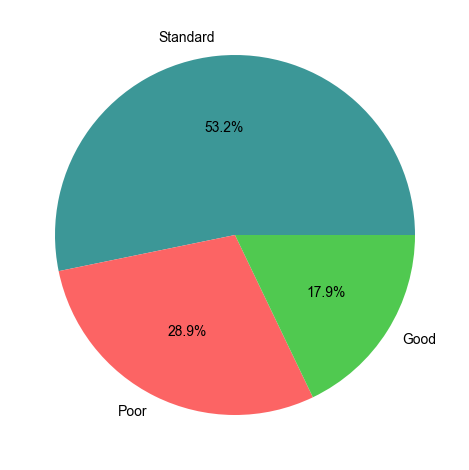

Before oversample
Credit_Score
Standard    42575
Poor        23124
Good        14301
Name: count, dtype: int64


In [33]:
data_raw['Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()
plt.ylabel('')
plt.show()

print('Before oversample')
print(data_raw['Credit_Score'].value_counts())

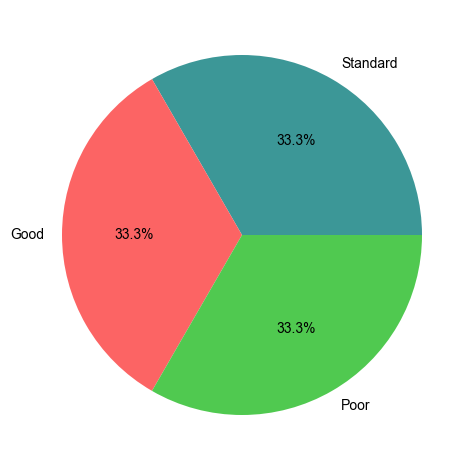

After oversample
Credit_Score
Standard    42575
Good        42575
Poor        42575
Name: count, dtype: int64


In [34]:
X = data1.drop(columns=['Credit_Score'])
y = data1['Credit_Score']

oversample = SMOTE()

X_resampled, y_resampled = oversample.fit_resample(X, y)

oversampled_data = pd.concat([X_resampled, y_resampled], axis=1)
oversampled_data['Credit_Score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()
plt.ylabel('')
plt.show()

print('After oversample')
print(oversampled_data['Credit_Score'].value_counts())

In [35]:
before = data1.shape[0]
after = oversampled_data.shape[0]
syntethic = after - before
print(f"\nNew data after oversample: {syntethic}")


New data after oversample: 47725


In [36]:
data1['Credit_Score'].value_counts()

Credit_Score
Standard    42575
Poor        23124
Good        14301
Name: count, dtype: int64

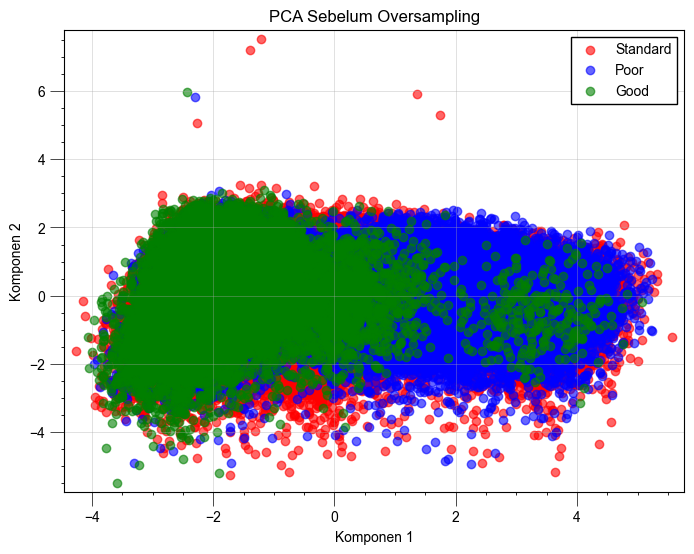

In [37]:
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X)

colors = {'Standard': 'red', 'Poor': 'blue', 'Good': 'green'}

plt.figure(figsize=(8, 6))
for class_label in ['Standard', 'Poor', 'Good']:
    plt.scatter(X_pca_before[y == class_label, 0], 
                X_pca_before[y == class_label, 1], 
                label=class_label, 
                color=colors[class_label], 
                alpha=0.6)

plt.title("PCA Sebelum Oversampling")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.legend()
plt.show()

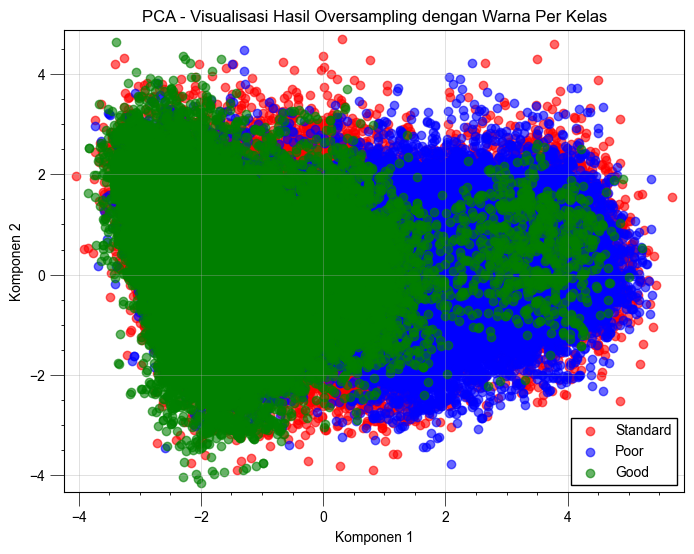

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

colors = {'Standard': 'red', 'Poor': 'blue', 'Good': 'green'}

plt.figure(figsize=(8, 6))
for class_label in ['Standard', 'Poor', 'Good']:
    plt.scatter(X_pca[y_resampled == class_label, 0],
                X_pca[y_resampled == class_label, 1],
                label=class_label,
                color=colors[class_label],
                alpha=0.6)

plt.title("PCA - Visualisasi Hasil Oversampling dengan Warna Per Kelas")
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.legend()
plt.show()

# Save to `.csv`

In [39]:
oversampled_data.to_csv('cleaned/train_cleaned.csv', index=False)
test.to_csv('cleaned/test_cleaned.csv', index=False)